## Part 4. Generative Learning Algorithms

이제까지, 우리는 $x$가 주어졌을 때 $y$의 조건부 분포를 모델로 만드는 $p(y|x;\theta)$ 학습 알고리즘만을 살펴보았다.

예를 들어, 로지스틱 회귀는 $p(y|x;\theta)$를 $h_\theta(x) = g(\theta^Tx)$로 모형화했다.

이제 다른 종류의 학습 알고리즘을 배워보자.


우리가 코끼리($y=1$)와 개($y=0$)를 구분하는 분류 문제를 해결한다고 하자. 트레이닝 셋이 주어졌을 때, 로지스틱 회귀나 퍼셉트론 알고리즘은 하나의 직선을 통해 그 문제를 해결하고자 한다. 

**직선 = 결정경계(decision boundary)**

그리고 새로운 데이터가 주어졌을 때, 이 동물이 경계에서 어느 쪽에 속하는지를 골라내 예측을 한다.

다른 접근법도 있다. 먼저 코끼리를 살펴본 후, 코끼리가 어떻게 생겼는지를 모형화한다. 그리고 개의 모형또한 만든다. 그리고 새로운 데이터가 주어졌을 때, 코끼리 모형과 개 모형에 둘 다 넣은 후 어느 쪽에 더 어울리는지 결정한다. 

$p(y|x)$를 직접 학습하거나(***로지스틱***) 입력 공간($X$)를 라벨 0, 1로 직접 매핑하는 (***퍼셉트론***) 알고리즘들을 **판별 학습 알고리즘(Discriminative learning algorithms)**라고 한다.

이와는 다르게 $p(x|y)$와 $p(y)$를 모형화하는 알고리즘들을 **생성 학습 알고리즘(Generative learning algorithms)**라고 한다. 예를 들어, 만약 $y$ 값이 한 예제가 개(0)인지 코끼리(1)인지 나타낸다면, $p(x|y=0)$ 은 개의 특징의 분포를 모형화하고, $p(x|y=1)$은 코끼리의 특징의 분포를 모형화한다.

$p(y)$(**class prior**)와 $p(x|y)$를 모형화하고 난 후, 베이즈 정리를 이용하여 $p(y|x)$ (**사후 분포, Posterior distribution**)을 구할 수 있다.

<br>
$$ p(y|x) = \frac{p(x|y)p(y)}{p(x) }$$
<br>

사실, 예측을 위해 $p(y|x)$를 계산할 때, 다음의 이유로 분모를 계산할 필요가 없다. 

<br>

$arg max_yp(y|x) \hspace{1cm}=  \hspace{1cm}arg max_y \frac{p(x|y)p(y)}{p(x)} \hspace{1cm} = \hspace{1cm} arg max_y p(x|y)p(y)$
<br>


<br>
### 1. Gaussian discriminant analysis

첫번째 생성 알고리즘은 **가우시안 판별 분석(Gaussian discriminant analysis, GDA)** 이다.

여기서 우리는 $p(x|y)$가 다변량정규분포를 따른다고 가정한다. GDA를 들어가기 앞서 다변량정규분포의 특징을 간단히 살펴본다.

#### 1-1. Multivariate normal distribution

$n$차원의 다변량정규분포는 **평균 벡터(mean vector)** $\mu$와 **공분산 행렬(covariance matrix)** $\Sigma$로 이루어진다. $(\Sigma \ge 0, \hspace{0.1cm} symmetric, positive\hspace{0.1cm}definite) $

확률밀도함수는 다음과 같다 :

<br>
$$ p(x; \mu, \Sigma) = \frac{1}{(2\pi)^{n/2|\Sigma|^1/2}}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))$$

$$where, \hspace{0.5cm} |\Sigma| = determinant(\Sigma) $$

In [64]:
np.empty((4,4))

array([[ 0.15151515,  0.        ,  0.        ,  0.5       ],
       [ 0.        ,  0.12987013,  0.        ,  0.43506494],
       [ 0.        ,  0.        ,  2.85714286,  0.42857143],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [94]:
X = [1, 2, 3, 4]
Y = [5, 6, 7, 8]

X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))

print(pos)
pos[:, :, 0] = X
pos[:, :, 1] = Y
pos

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.einsum.html

[[[ 1.  5.]
  [ 2.  5.]
  [ 3.  5.]
  [ 4.  5.]]

 [[ 1.  6.]
  [ 2.  6.]
  [ 3.  6.]
  [ 4.  6.]]

 [[ 1.  7.]
  [ 2.  7.]
  [ 3.  7.]
  [ 4.  7.]]

 [[ 1.  8.]
  [ 2.  8.]
  [ 3.  8.]
  [ 4.  8.]]]


array([[[ 1.,  5.],
        [ 2.,  5.],
        [ 3.,  5.],
        [ 4.,  5.]],

       [[ 1.,  6.],
        [ 2.,  6.],
        [ 3.,  6.],
        [ 4.,  6.]],

       [[ 1.,  7.],
        [ 2.,  7.],
        [ 3.,  7.],
        [ 4.,  7.]],

       [[ 1.,  8.],
        [ 2.,  8.],
        [ 3.,  8.],
        [ 4.,  8.]]])

In [87]:
a = np.arange(25).reshape(5,5)
b = np.arange(5)
c = np.arange(6).reshape(2,3)

print(a)
print(b)
print(c)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[0 1 2 3 4]
[[0 1 2]
 [3 4 5]]


In [93]:
np.einsum('ij', a)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [88]:
np.einsum('ii', a)

60

[[  1.96412803e-05   2.65106704e-05   3.54144267e-05 ...,   3.54144267e-05
    2.65106704e-05   1.96412803e-05]
 [  2.78414937e-05   3.75788467e-05   5.01999117e-05 ...,   5.01999117e-05
    3.75788467e-05   2.78414937e-05]
 [  3.89136492e-05   5.25234054e-05   7.01636835e-05 ...,   7.01636835e-05
    5.25234054e-05   3.89136492e-05]
 ..., 
 [  1.48978707e-06   2.01082889e-06   2.68617698e-06 ...,   2.68617698e-06
    2.01082889e-06   1.48978707e-06]
 [  9.46647536e-07   1.27773039e-06   1.70686326e-06 ...,   1.70686326e-06
    1.27773039e-06   9.46647536e-07]
 [  5.93115274e-07   8.00552880e-07   1.06942302e-06 ...,   1.06942302e-06
    8.00552880e-07   5.93115274e-07]]


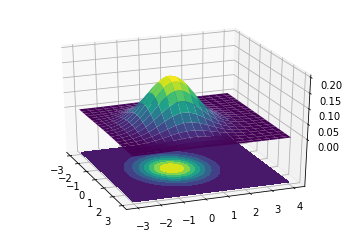

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# 2-dimensional distribution over variables X, Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)
    # make (X,Y) coordinates (grid)

mu = np.array([0, 0])
sigma = np.eye(2)


pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, sigma) :
    n = mu.shape[0]
    sigma_det = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    N = np.sqrt((2*np.pi)**n * sigma_det)
    
    fac = np.einsum('...k,kl,...l->...', pos-mu, sigma_inv, pos-mu)
    
    return np.exp(-fac/2) /N

Z = multivariate_gaussian(pos, mu, sigma)

print(Z)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)
cset= ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

ax.set_zlim(-0.15, 0.2)
ax.set_zticks(np.linspace(0, 0.2, 5))
ax.view_init(27, -21)
plt.show()

In [47]:
from scipy.stats import multivariate_normal

F = multivariate_normal(mu, sigma)
Z = F.pdf(pos)
Z

array([[  1.96412803e-05,   2.65106704e-05,   3.54144267e-05, ...,
          3.54144267e-05,   2.65106704e-05,   1.96412803e-05],
       [  2.78414937e-05,   3.75788467e-05,   5.01999117e-05, ...,
          5.01999117e-05,   3.75788467e-05,   2.78414937e-05],
       [  3.89136492e-05,   5.25234054e-05,   7.01636835e-05, ...,
          7.01636835e-05,   5.25234054e-05,   3.89136492e-05],
       ..., 
       [  1.48978707e-06,   2.01082889e-06,   2.68617698e-06, ...,
          2.68617698e-06,   2.01082889e-06,   1.48978707e-06],
       [  9.46647536e-07,   1.27773039e-06,   1.70686326e-06, ...,
          1.70686326e-06,   1.27773039e-06,   9.46647536e-07],
       [  5.93115274e-07,   8.00552880e-07,   1.06942302e-06, ...,
          1.06942302e-06,   8.00552880e-07,   5.93115274e-07]])

![title](./Gaussian1.png)

왼쪽은 평균이 0벡터이고, 공분산행렬이 항등행렬인 분포이다.

가운데는 공분산행렬이 $0.6I$, 우측은 $2I$이다. 공분산행렬이 커질수록 더 퍼져나가고, 작아질수록 좁아지는 것을 알 수 있다.

![title](./Gaussian2.png)

왼쪽부터 각각 비대각행렬이 0, 0.5, 0.8인 그림이다.

이 값이 커질수록 45도 $(x_1= x_2)$ 방향으로 데이터가 더 압축되는 것을 볼 수 있다.

![title](./Gaussian3.png)

이번에는 $\Sigma=I$로 고정시키고 $\mu$ 값을 변동시킨 그림이다.

그대로 평행이동하는 것을 알 수 있다.

#### 1-2. The Gaussian Discriminant Analysis model

입력 변수 $x$가 연속형 확률변수인 분류 문제에서, GDA 모형을 쓸 수 있다.

이때, 다변량정규분포를 사용해 $p(x|y)$를 다음과 같이 만들 수 있다.

<br>
$$ y \sim Bernoulli(\phi)$$
$$ x|y = 0 \sim N(\mu_0, \Sigma)$$
$$ x|y = 1 \sim N(\mu_1, \Sigma)$$
<br>

이를 풀어서 쓰면,

<br>
$ p(y) = \phi^y(1-\phi)^{1-y}$

$ p(x|y=0) = \frac{1}{(2\pi)^{n/2|}\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0))$

$ p(x|y=1) = \frac{1}{(2\pi)^{n/2|}\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1))$
<br>

이 모형의 파라미터는 $\phi, \Sigma, \mu_0, \mu_1$이고, 데이터에 대한 로그 우도함수는 아래와 같다.

<br>

$ l(\phi, \mu_0, \mu_1, \Sigma) $

$ = log\prod_{i=1}^mp(x^{(i)}, y^{(i)}; \phi, \mu_0, \mu_1, \Sigma) $

$ = log\prod_{i=1}^mp(x^{(i)}| y^{(i)};  \mu_0, \mu_1, \Sigma) p(y^{(i)};\phi)$

<br>

여기서 참고할 점은,

**Discriminative Algorithm(로지스틱)**에서는 
<br>
$ l(\theta) = log\prod_{i=1}^mp(y^{(i)}|x^{(i)};\theta) $ 의 **조건부 우도함수**를 구했지만,

<br>
**Generative Algorithm(GDA)**에서는
<br>
$l(\phi, \mu_0, \mu_1, \Sigma) = log\prod_{i=1}^mp(x^{(i)}, y^{(i)})$의 **결합 우도함수**를 구했다는 점이다!

<br>
다시 돌아가서, $l$을 파라미터에 대해서 최대화하면, 아래 결과를 얻을 수 있다.

<br>

$ \phi = \frac{1}{m}\sum_{i=1}^mI\{y^{(i)}=1\} = \{전체에서 y=1인 비율\}$

$ \mu_0 = \frac{\sum_{i=1}^mI\{y^{(i)}=0\}x^{(i)}}{\sum_{i=1}^mI\{y^{(i)}=0\}} = \{ y=0인 것들의 평균 값\} $

$ \mu_1 = \frac{\sum_{i=1}^mI\{y^{(i)}=1\}x^{(i)}}{\sum_{i=1}^mI\{y^{(i)}=1\}} = \{ y=1인 것들의 평균 값\} $

$ \Sigma = \frac{1}{m}\sum_{i=1}^m( x^{(i)}-\mu_{y^{(i)}})( x^{(i)}-\mu_{y^{(i)}})^T $

<br>

이제 예측을 해보자.

<br>

$argmax_yp(y|x) = argmax_yp(x|y)p(y)$ = value of $y$ that maximizes $p(x|y)p(y)$

*if $p(y)$ is uniform* : $argmax_yp(x|y)$



![title](./Gaussian4.png)


위에 주어진 점들은 트레이닝 셋이고, 두 가우시안 분포의 도면을 보여준다.

두 분포 모두 같은 모양과 방향을 지녔지만 ($\Sigma$가 같기 때문), 평균이 달라서 서로 겹치지 않는다.

그리고 그림의 직선은 $p(y=1|x) = 0.5$인 결정 경계를 뜻한다. 

#### 1-3. GDA and logistic regression

GDA 모형과 로지스틱 회귀는 흥미로운 관계에 있다.

만약 $p(y=1|x; \phi, \mu_0, \mu_1, \Sigma)$를 $x$의 함수로 보면, 다음과 같이 표현된다.

<br>
$$ p(y=1|x; \phi, \Sigma, \mu_0, \mu_1) = \frac{1}{1+exp(-\theta^Tx)} $$
<br>

이는 판별 알고리즘은 로지스틱 회귀의 식이다.

GDA와 로지스틱 회귀는 같은 데이터셋으로 학습하여도 서로 다른 결정 경계를 보여줄 것이다. 

그렇다면 둘 중 어느것을 써야할까? 

###### a. GDA
방금 우리는 $p(x|y)$가 다변량정규분포이면 $p(y=1|x)$가 로지스틱 함수라는 것을 밝혀냈다. 하지만 그 역은 성립하지 않는다. 

이는 GDA가 로지스틱 회귀보다 데이터에 대한 **더 강력한 가정**을 내포한다는 것을 의미한다.

만약 모형의 가정이 정확하면, GDA는 데이터에 더 적합하고 더 나은 모형이 된다. 특히 $p(x|y)$가 실제로 정규분포이면, GDA는 **점근적으로 효율적(asymptotically efficient)**이다.

쉽게 말하면, 아주 아주 큰 트레이닝 셋이 있을 경우, GDA보다 더 나은 알고리즘은 없다는 뜻이다.

또한 일반적으로, 이러한 가정이 충족될 경우 작은 트레이닝 셋에서도 GDA는 로지스틱보다 성능이 좋다.

###### b. Logistic

반대로, 가정이 더 약할 경우, 로지스틱 회귀가 더 학습에 용이하고 부정확한 모형의 가정에 둔감하다. $p(y|x)$가 로지스틱 함수의 형태를 취하는 여러가지 가정이 있다.

예를 들어, $x|y = 0 \sim Poisson(\lambda_0) $, $x|y = 1 \sim Poisson(\lambda_1)$인 경우 $p(y|x)$는 로지스틱 함수가 된다. 즉, 포아송 분포에도 로지스틱 회귀는 잘 맞는다.

**더 일반적으로,**

**$ x|y=1 \sim ExpFamily(\eta_1) $, $x|y=0 \sim ExpFamily(\eta_0)$ 일 경우, $p(y=1|x)$는 로지스틱 함수다!!**


하지만 GDA를 비정규분포 데이터에 적합시킬 경우, 그 예측력은 떨어진다.

###### summarize

요약하자면, GDA는 더 강한 모형의 가정이 필요하고, 모형의 가정이 잘 충족될 경우 데이터 효율적이다. (학습을 '잘' 하는데 더 적은 데이터셋이 필요하다.) 

로지스틱 회귀는 가정이 더 약하지만 이러한 가정에서 벗어나도 모형이 ***로버스트***하다.
특히 데이터가 비정규분포라도, 데이터가 많다면 로지스틱 회귀는 GDA보다 결과가 좋다.

이러한 이유 때문에, 실제로는 로지스틱 회귀가 GDA보다 더 많이 쓰인다. 